In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression

In [2]:
analyst_data = pd.read_csv('Datasets/Analyst_Forecasts.csv')
analyst_data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Votes
0,-1.388211,-1.389959,0.347923,-0.052494,-0.202153,0.057804,1.183421,0.183474,550
1,0.456374,1.095764,0.463571,0.905927,0.249351,0.081663,-0.550198,-0.495891,670
2,0.003587,-0.420926,-1.600987,0.028840,1.105627,0.739811,-0.975828,-0.519515,546
3,-1.284997,-0.063613,-1.161092,0.685333,-1.701926,1.942891,-0.780951,-1.231096,400
4,-0.179291,0.309389,0.624467,-1.374801,0.689295,-0.194378,-1.406515,0.461056,572


In [3]:
X = analyst_data[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']]
y = analyst_data[['Votes']]

In [4]:
X.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
0,-1.388211,-1.389959,0.347923,-0.052494,-0.202153,0.057804,1.183421,0.183474
1,0.456374,1.095764,0.463571,0.905927,0.249351,0.081663,-0.550198,-0.495891
2,0.003587,-0.420926,-1.600987,0.028840,1.105627,0.739811,-0.975828,-0.519515
3,-1.284997,-0.063613,-1.161092,0.685333,-1.701926,1.942891,-0.780951,-1.231096
4,-0.179291,0.309389,0.624467,-1.374801,0.689295,-0.194378,-1.406515,0.461056


In [5]:
y.describe()

,Votes
count,1000.000000
mean,500.013000
std,100.042408
min,155.000000
25%,435.000000
50%,500.000000
75%,568.000000
max,797.000000


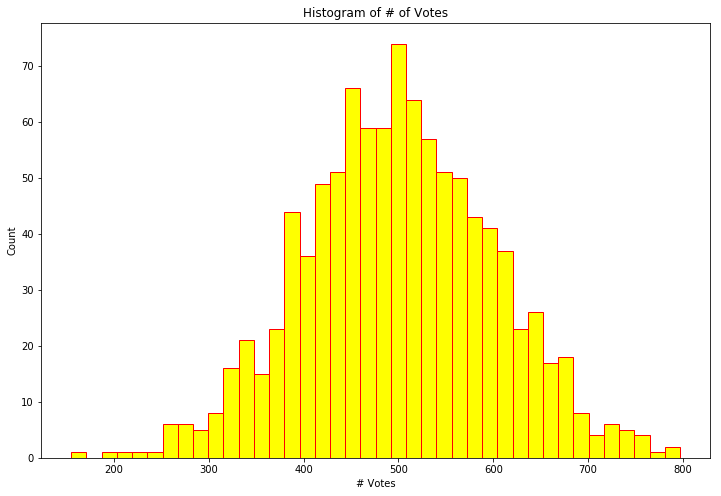

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.hist(analyst_data['Votes'], facecolor='yellow', edgecolor='red', bins=40)
plt.xlabel('# Votes')
plt.ylabel('Count')
plt.title('Histogram of # of Votes')
plt.show();

In [7]:
analyst_data['Variability'] = analyst_data[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8']].var(axis=1)
analyst_data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Votes,Variability
0,-1.388211,-1.389959,0.347923,-0.052494,-0.202153,0.057804,1.183421,0.183474,550,0.751824
1,0.456374,1.095764,0.463571,0.905927,0.249351,0.081663,-0.550198,-0.495891,670,0.350491
2,0.003587,-0.420926,-1.600987,0.028840,1.105627,0.739811,-0.975828,-0.519515,546,0.771014
3,-1.284997,-0.063613,-1.161092,0.685333,-1.701926,1.942891,-0.780951,-1.231096,400,1.522004
4,-0.179291,0.309389,0.624467,-1.374801,0.689295,-0.194378,-1.406515,0.461056,572,0.709765


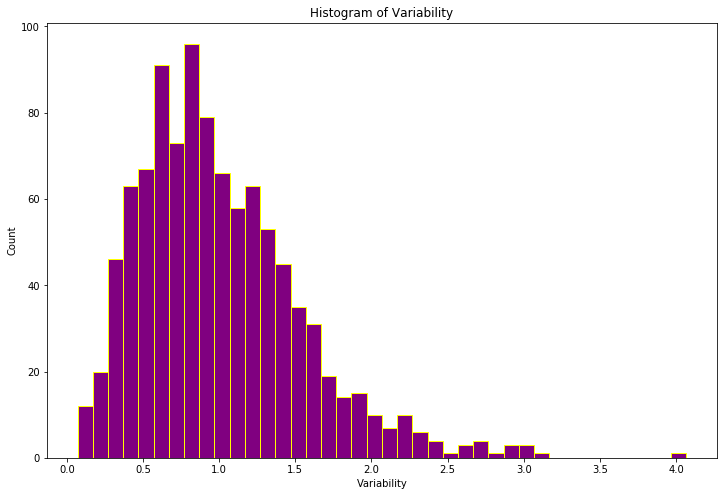

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.hist(analyst_data['Variability'], facecolor='purple', edgecolor='yellow', bins=40)
plt.xlabel('Variability')
plt.ylabel('Count')
plt.title('Histogram of Variability')
plt.show();

In [9]:
linear_regression = LinearRegression().fit(X, y)
linear_regression.score(X, y)

0.008116291372005646

In [10]:
y_predict = linear_regression.predict(X)

In [11]:
results_df = pd.DataFrame({'y_actual': y['Votes'], 
                           'y_predicted': y_predict.reshape(1, -1)[0]})
results_df.head()

,y_actual,y_predicted
0,550,494.619586
1,670,503.899640
2,546,510.953328
3,400,502.212805
4,572,496.418362


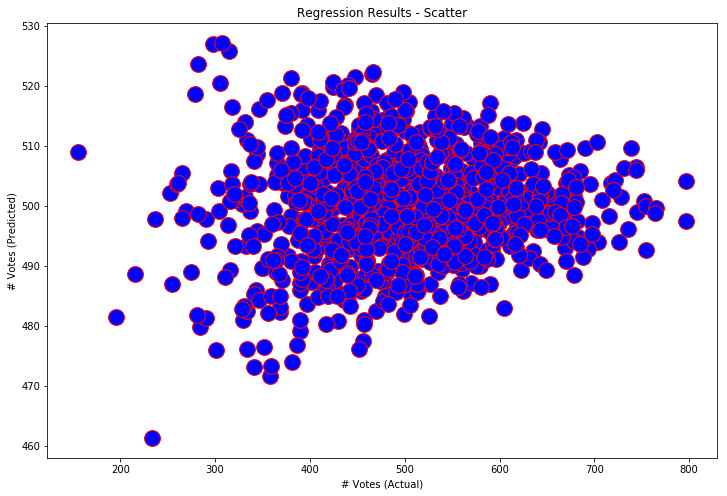

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(y, y_predict, facecolor='blue', edgecolor='red', s=250)
plt.ylabel('# Votes (Predicted)')
plt.xlabel('# Votes (Actual)')
plt.title('Regression Results - Scatter');

In [13]:
X_chi_sq = analyst_data[['Variability']]
X_chi_sq.head()

,Variability
0,0.751824
1,0.350491
2,0.771014
3,1.522004
4,0.709765


## Box-Cox

In [14]:
power_transformer = PowerTransformer(method='box-cox')
X_transformed = power_transformer.fit(X_chi_sq).transform(X_chi_sq)

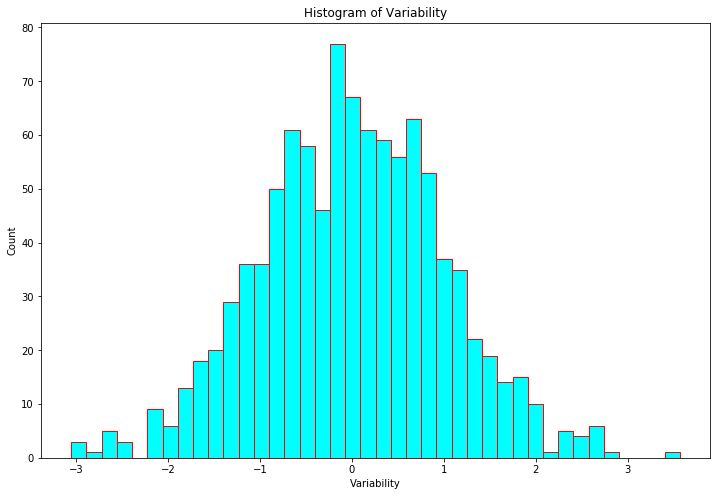

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.hist(X_transformed, facecolor='cyan', edgecolor='red', bins=40)
plt.xlabel('Variability')
plt.ylabel('Count')
plt.title('Histogram of Variability')
plt.show();

In [16]:
linear_regression = LinearRegression().fit(X_transformed, y)
linear_regression.score(X_transformed, y)

0.8620498867354698

In [17]:
y_predict_transformed = linear_regression.predict(X_transformed).reshape(1, -1)[0]
linear_regression.coef_

array([[-92.83956105]])

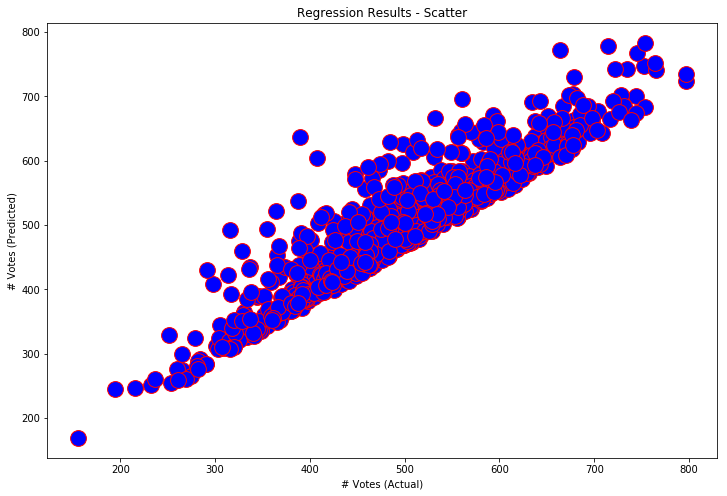

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(y, y_predict_transformed, facecolor='blue', edgecolor='red', s=250)
plt.ylabel('# Votes (Predicted)')
plt.xlabel('# Votes (Actual)')
plt.title('Regression Results - Scatter');

In [19]:
results_df = pd.DataFrame({'y_actual': y['Votes'], 
                           'y_predicted': y_predict_transformed.reshape(1, -1)[0]})
results_df.head()

,y_actual,y_predicted
0,550,531.848444
1,670,636.769502
2,546,527.873655
3,400,405.991955
4,572,540.794249


## Yeo Johnson

In [20]:
power_transformer = PowerTransformer(method='yeo-johnson')
X_transformed = power_transformer.fit(X_chi_sq).transform(X_chi_sq)

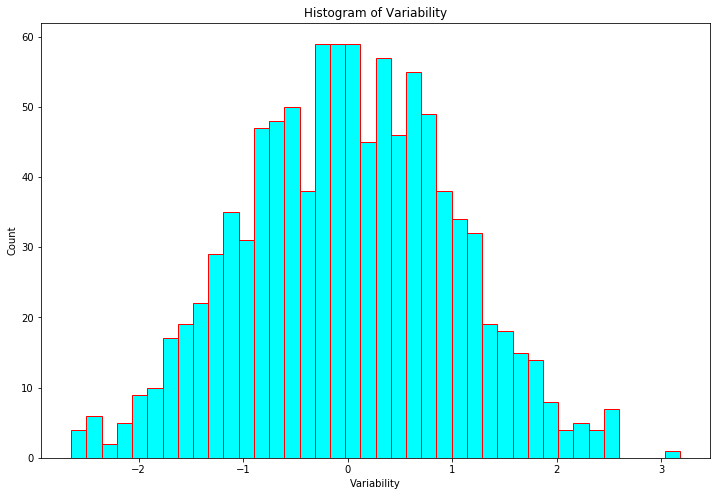

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.hist(X_transformed, facecolor='cyan', edgecolor='red', bins=40)
plt.xlabel('Variability')
plt.ylabel('Count')
plt.title('Histogram of Variability')
plt.show();

In [22]:
linear_regression = LinearRegression().fit(X_transformed, y)
linear_regression.score(X_transformed, y)

0.8615349517506922

In [23]:
y_predict_transformed = linear_regression.predict(X_transformed).reshape(1, -1)[0]
linear_regression.coef_

array([[-92.81182862]])

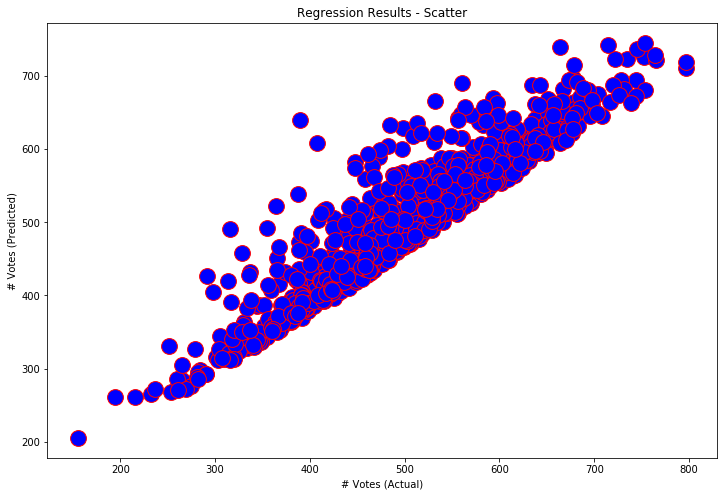

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(y, y_predict_transformed, facecolor='blue', edgecolor='red', s=250)
plt.ylabel('# Votes (Predicted)')
plt.xlabel('# Votes (Actual)')
plt.title('Regression Results - Scatter');